In [74]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [75]:
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [76]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### Einfache Lineare Regression

#### Formeln:

  - $m = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}$ 
    
  - $b = \bar{y} - m \cdot \bar{x}$
    
  - $R^2 = 1 - \frac{\sum_{i=1}^n(y_i-\hat{y})^2}{\sum_{i=1}^n(y_i-\bar{y})^2}$
  
  - $y = m \cdot x + b$
  
#### Bedeutung:
  
  - $R^2 :=$ Wie viel Streuung kann von dem Regressionsmodell erklärt werden
  - $m :=$ Steigung der Geraden
  - $b :=$ y-Achsenabschnitt
  
#### Symbole:
  - $\bar{x} :=$ Mittelwert von $x$
  - $\hat{y} :=$ Schätzung zum Wert x

In [77]:
class SimpleLinearRegression:
    def __init__(self):
        self.coef_: np.ndarray = None
        self.intercept_: np.ndarray = None

    def _compute_coeffs(self, x, y, x_mean, y_mean):
        frac1 = sum(
            [(x[i] - x_mean) * (y[i] - y_mean) for i in range(len(x))]
        )
        frac2 = sum(
            [(x[i] - x_mean)**2 for i in range(len(x))]
        )
        self.coef_ = frac1 / frac2

    def _compute_intercept(self, x_mean, y_mean):
        self.intercept_ = y_mean - np.dot(self.coef_.T, x_mean)

    def fit(self, X: np.ndarray, y: np.ndarray):
        x_mean = np.mean(X, axis=0)
        y_mean = np.mean(y, axis=0)
        self._compute_coeffs(X, y, x_mean, y_mean)
        self._compute_intercept(x_mean, y_mean)

    def predict(self, X: np.ndarray):
        y_pred = np.array(
            [np.dot(self.coef_.T, xi) + self.intercept_ for xi in X]
        )
        return y_pred

    def score(self, X: np.ndarray, y: np.ndarray):
        y_pred = self.predict(X)
        y_mean = np.mean(y, axis=0)
        frac1 = sum(
            [(y[i] - y_pred[i])**2 for i in range(len(y))]
        )
        frac2 = sum(
            [(y[i] - y_mean)**2 for i in range(len(y))]
        )
        r2 = 1.0 - frac1 / frac2
        return r2

In [78]:
np.random.seed(42)

x = dataset.data[:, 5:6]
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [79]:
regr = SimpleLinearRegression()
regr.fit(x_train, y_train)
r2_score = regr.score(x_test, y_test)

print(f"Coeffs: {regr.coef_}")
print(f"Intercept: {regr.intercept_}")
print(f"R2-Score: {r2_score}")

Coeffs: [9.1181022]
Intercept: -34.662307438406806
R2-Score: 0.45846499343030667


In [80]:
def plot_regressor(regr, x, y):
    lower_bound = np.min(y) - 1
    upper_bound = np.max(y) + 1
    y_pred = regr.predict(x)
    plt.scatter(x, y, color="blue")
    plt.plot(x, y_pred, color="red")
    plt.show()

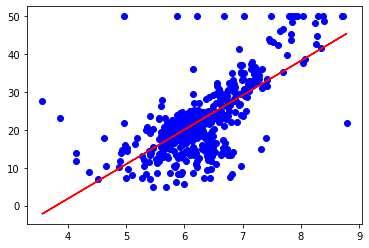

In [81]:
plot_regressor(regr, x, y)